In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotnine as pn
from pathlib import Path  #%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotnine as pn
import seaborn as sns
from pathlib import Path

In [2]:
# constructs = {
#
#     "TFIIB FL": 113,
#     "TFIIB Core": 28,
#     "TFIIB IDR": 153,
# }

constructs = {

    "TBP FL": 9,
    "TBP Core": 23,
    "TBP IDR": 63,
}


In [3]:
def fix_concentration(row, constructs):
    return constructs[row["prep"]] / row["dir_name"]

In [4]:
def load_construct_regions_and_cfs(constructs, base_dir, fix_conc=False):
    regions_dfs = []
    condensed_fraction_dfs = []

    for key in constructs.keys():
        temp = pd.read_csv(base_dir / key / f"{key}_regions.csv")
        temp["prep"] = key
        regions_dfs.append(temp)
        temp = pd.read_csv(base_dir / key / f"{key}_condensed_fractions.csv")
        temp["prep"] = key
        condensed_fraction_dfs.append(temp)

    regions = pd.concat(regions_dfs)
    condensed_fractions = pd.concat(condensed_fraction_dfs)

    if fix_conc:
        condensed_fractions["conc"] = condensed_fractions.apply(lambda row: fix_concentration(row, constructs), axis=1)

    return regions, condensed_fractions


In [6]:
base_dir = Path(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TBP")

In [7]:
regions, condensed_fractions = load_construct_regions_and_cfs(constructs, base_dir, fix_conc=True)

In [9]:
temp = condensed_fractions[["prep", "conc", "condensed_fraction"]]

In [10]:
temp.columns = ["colour", "x", "y"]

In [11]:

temp.loc[:, "x"] = temp["x"].astype("category")
temp.loc[:, "log_y"] = np.log10(temp["y"] + 1)

C:\Users\danie\AppData\Local\Temp\ipykernel_9176\2979080647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [107]:
# replacement = {
#     0.21875: 0.5,
#     0.4375: 0.5,
#     0.59765625: 0.5,
#     0.875: 1,
#     0.8828125: 1,
#     1.1953125: 1,
#     1.75: 2,
#     1.765625: 2,
#     2.390625: 2,
#     3.5: 3.5,
#     3.53125: 3.5,
#     4.78125: 5,
#     7.0: 7,
#     7.0625: 7,
#     9.5625: 9,
#     14.125: 14,
#     19.125: 20,
#     28.25: 28,
#     38.25: 38
# }

In [24]:
replacement = {
    0.11842105263157894: 0.1,
    0.12849162011173185: 0.1,
    0.23684210526315788: 0.1,
    0.25842696629213485: 0.1,
    0.47368421052631576: 0.5,
    0.4921875: 0.5,
    0.5227272727272727: 0.5,
    0.984375: 1,
    1.0: 1,
    1.0454545454545454: 1,
    1.96875: 2,
    2.090909090909091: 2,
    2.25: 2,
    3.9375: 4,
    4.5: 5,
    4.6: 5,
    7.875: 8,
    11.5: 11,
    15.75: 16
}

In [25]:
def help(row):
    if row["x"] in replacement.keys():
        return replacement[row["x"]]
    else:
        return row["x"]

In [26]:
temp.loc[:, "x"] = temp.apply(lambda row: help(row), axis=1)

In [27]:
temp.loc[:, "x"] = temp["x"].astype("category")

In [13]:
temp["colour"] = temp["colour"].astype("str")

C:\Users\danie\AppData\Local\Temp\ipykernel_9176\1178038823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
temp[temp["colour"] == "TBP Core"] = "TBP C"

C:\Users\danie\AppData\Local\Temp\ipykernel_9176\247773539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TypeError: Cannot setitem on a Categorical with a new category (TBP C), set the categories first

In [20]:
temp["x"] = temp["x"].astype("float")

C:\Users\danie\AppData\Local\Temp\ipykernel_9176\1754751871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
np.unique(temp["x"]).tolist()

[0.11842105263157894,
 0.12849162011173185,
 0.23684210526315788,
 0.25842696629213485,
 0.47368421052631576,
 0.4921875,
 0.5227272727272727,
 0.984375,
 1.0,
 1.0454545454545454,
 1.96875,
 2.090909090909091,
 2.25,
 3.9375,
 4.5,
 4.6,
 7.875,
 11.5,
 15.75]

In [35]:
temp.loc[temp["colour"] == "TBP IDR", "y"] = 0

In [36]:
temp[temp["colour"] == "TBP IDR"]

,colour,x,y,log_y
0,TBP IDR,0.5,0.0,0.301030
1,TBP IDR,0.5,0.0,0.301030
2,TBP IDR,0.5,0.0,0.301030
3,TBP IDR,0.5,0.0,0.299059
4,TBP IDR,0.5,0.0,0.301030
...,...,...,...,...
59,TBP IDR,8.0,0.0,0.301030
60,TBP IDR,8.0,0.0,0.301030
61,TBP IDR,8.0,0.0,0.301030
62,TBP IDR,8.0,0.0,0.301030


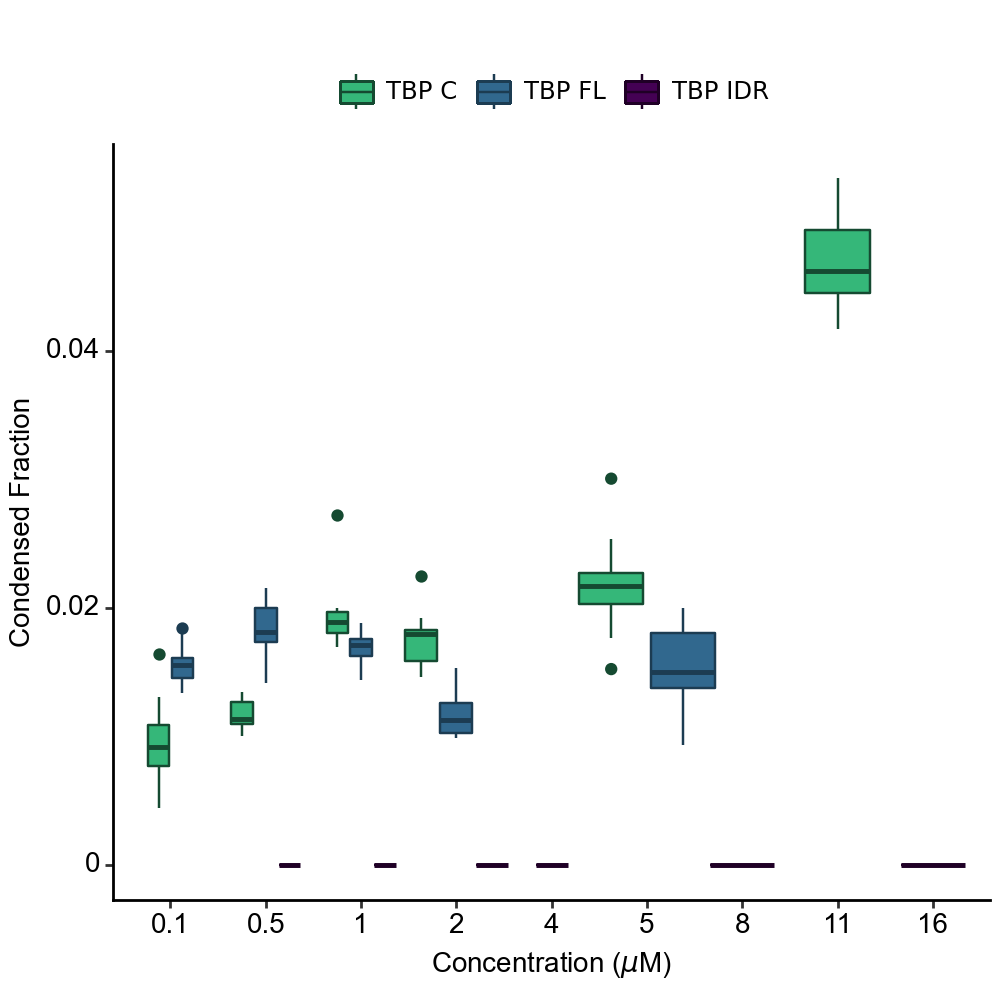

<Figure Size: (500 x 500)>

In [40]:
plot = (
        pn.ggplot(temp, pn.aes(x="x", y="y", shape="colour", fill="colour", color="colour"))
        # + pn.geom_point()
        + pn.geom_boxplot()
        + pn.theme_classic()
        + pn.labs(x="Concentration ($\mu$M)", y="Condensed Fraction", color="", fill="",
                  shape="")
        + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
        + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [41]:
plot.save(base_dir / "condensed_fraction_boxplot_tbp.svg", dpi=1200, width=80, height=80, units="mm")

C:\Users\danie\code\llps_analysis\env\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 80.0 x 80.0 mm image.
C:\Users\danie\code\llps_analysis\env\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: C:\Users\danie\OneDrive - University of Cape Town\Hons Project\DataAnalysis\new_analysis_20231031\TBP\condensed_fraction_boxplot_tbp.svg


In [ ]:
# # TFIIB Colours:
# + pn.scale_fill_manual(values=["#66c2a5", "#fc8d62", "#8da0cb"])
#         + pn.scale_color_manual(values=["#3a6b5c", "#a1583b", "#5d6a87"])